# IMPORTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dataset_functions import *
from common_functions import *

from sklearn.svm import SVC
from joblib import dump, load
from sklearn.metrics import accuracy_score

# SUPPORT VECTOR MACHINE

## FUNCTIONS

### CHOOSE OPTIMAL VALUES FUNCTION

In [20]:
def print_parameters(values, hit_total_history):
    """
    A partir de unos valores y un array de aciertos, dibuja una gráfica que
    los relaciona.
    """
    for hit in hit_total_history:
        plt.plot(values, hit)
        
    plt.xlabel('S')
    plt.ylabel('hit_accuracy')
    plt.legend(values)
    
    plt.show()

In [21]:
def parameter_election(X, Y, X_val, Y_val, kernel):
    """
    A partir de unas características y unos resultados, tanto de
    entrenamiento como de CV, y un tipo de kernel, obtiene los parámetros
    óptimos del modelo. Para conocer los parámetros óptimos nos basamos
    en el acierto que tiene el modelo con dichos parámetros.
    Devuelve la precisión, y los parámetros óptimos.
    """
    values = [ .01, .03, .1, .3, 1, 3, 10 ]

    c_opt = None
    s_opt = None
    acc_opt = 0
    hit_history = []
    hit_total_history = []
    
    for C in values:
        hit_history = []
        for S in values:
            gamma = 1 / (2 * S**2) 
            
            svm = SVC(kernel=kernel, C=C, gamma=gamma)
            svm.fit(X, Y)
            acc = np.round(
                accuracy_score(Y_val, svm.predict(X_val)) * 100,
                decimals = 2
            )
            
            hit_history.append(acc)
            print('C: {}\tS: {}\t-> {}%'.format(C, S, acc))
            
            if(acc > acc_opt):
                acc_opt = acc
                c_opt = C
                s_opt = S

                
            if(acc_opt == 100.0):
                save_svm_model(svm)
                break
                
        hit_total_history.append(hit_history)
    
        if(acc_opt == 100.0):
            break
    
    if(acc_opt < 100.0):
        print_parameters(values, hit_total_history)
        
    return acc_opt, c_opt, s_opt

## EXTERNAL FUNCTIONS

In [22]:
def save_svm_model(model):
    """
    Guarda el modelo SVM en la ruta models/model_svm.joblib
    """
    dump(model, 'models/model_svm.joblib')

In [23]:
def load_svm_model():
    """
    Carga el modelo SVM en la ruta models/model_svm.joblib
    """
    return load('models/model_svm.joblib')

In [24]:
def show_svm_prediction():
    """
    Carga los datos y el modelo óptimo, divide los datos y
    prueba el modelo sobre esos datos.
    Finalmente muestra el porcentaje de acierto de esos datos
    """
    X, Y = read_dataset()
    X, Y = manage_data(X, Y, use_onehot = False)
    
    _, _, _, _, X_test, Y_test = divide_dataset(X, Y)
    svm = load_svm_model()
    
    percentage = np.round(
        accuracy_score(Y_test, svm.predict(X_test)) * 100,
        decimals = 2
    )
    
    print("The SVM is reliable in {:.2f}% of the time\n"
      .format(percentage))

In [25]:
def predict_example_svm(example):
    """
    Carga el modelo óptimo y, a partir de un ejemplo, predice su resultado
    devuelve la predicción como booleano
    """
    svm = load_svm_model()
    return bool(svm.predict(np.array([example])))

In [26]:
def main_svm():
    """
    Función que entrena el clasificador, obtiene el modelo óptimo y
    lo guarda.
    """
    X, Y = read_dataset()
    X, Y = manage_data(X, Y, use_onehot = False)
    m = X.shape[0]
    n = X.shape[1]

    X_train, Y_train, X_cv, Y_cv, X_test, Y_test = divide_dataset(X, Y)
    
    acc_opt, c_opt, s_opt = parameter_election(X_train, Y_train,
                                               X_cv, Y_cv, 'rbf')

C: 0.01	S: 0.01	-> 93.84%
C: 0.01	S: 0.03	-> 93.84%
C: 0.01	S: 0.1	-> 93.84%
C: 0.01	S: 0.3	-> 93.84%
C: 0.01	S: 1	-> 93.84%
C: 0.01	S: 3	-> 93.84%
C: 0.01	S: 10	-> 93.84%
C: 0.01	S: 30	-> 93.84%
C: 0.01	S: 100	-> 93.84%
C: 0.03	S: 0.01	-> 94.21%
C: 0.03	S: 0.03	-> 94.21%
C: 0.03	S: 0.1	-> 94.21%
C: 0.03	S: 0.3	-> 94.21%
C: 0.03	S: 1	-> 94.21%
C: 0.03	S: 3	-> 94.21%
C: 0.03	S: 10	-> 94.21%
C: 0.03	S: 30	-> 94.21%
C: 0.03	S: 100	-> 94.21%
C: 0.1	S: 0.01	-> 94.21%
C: 0.1	S: 0.03	-> 94.21%
C: 0.1	S: 0.1	-> 94.21%
C: 0.1	S: 0.3	-> 94.21%
C: 0.1	S: 1	-> 94.21%
C: 0.1	S: 3	-> 94.21%
C: 0.1	S: 10	-> 94.21%
C: 0.1	S: 30	-> 94.21%
C: 0.1	S: 100	-> 94.21%
C: 0.3	S: 0.01	-> 95.69%
C: 0.3	S: 0.03	-> 95.69%
C: 0.3	S: 0.1	-> 95.69%
C: 0.3	S: 0.3	-> 95.69%
C: 0.3	S: 1	-> 95.69%
C: 0.3	S: 3	-> 95.69%
C: 0.3	S: 10	-> 95.69%
C: 0.3	S: 30	-> 95.69%
C: 0.3	S: 100	-> 95.69%
C: 1	S: 0.01	-> 96.67%
C: 1	S: 0.03	-> 96.67%
C: 1	S: 0.1	-> 96.67%
C: 1	S: 0.3	-> 96.67%
C: 1	S: 1	-> 96.67%
C: 1	S: 3	-> 96.67%
C: 1

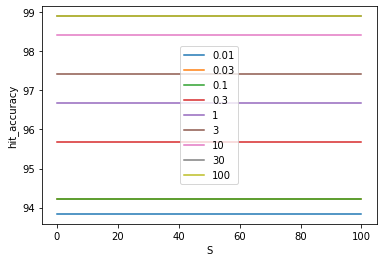

In [27]:
# main_svm()